# NeuroLit Prediction Notebook
## Software Engineering for Data Scientists, Autumn 2017
## Maggie Clarke, Patrick Donnelly, & Sritam Kethireddy

In [1]:
# import necessary modules
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import neurolit as nlit

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Initialize dataset
To zero in on the data of interest, and before applying ML techniques, select the variables of interest for analysis.

**data_folder**: choose a location to store temporary data files that are locally available

**selected_metalabels**: choose a group of variables of interest to form and test model
    options include:
        * WJ - Woodcock Johnson IV Tests of Achievement
        * TOWRE - Test of Word Reading Efficiency
        * WASI - Weschler Abbreviated Scale of Intelligence
        * CTOPP - Comprehensive Test of Phonological Processing
        
**metalabel_files**: this is the file that categorizes the variables with metalabels

**selected_features**: for future functionality, this variable can zero in on a specific variable of interest
        in the current iteration, this can only be a test that does not fall within the metalabel selected
        
**outcome_variable**: this variable relates to the survey variable of interest

**missingness_threshold**: set threshold for amount of missing data permitted for analysis

**max_missing_count**: allot the number of permitted missing values for a particular participant

For a desciption of the reading assessment variables, visit the [Brain Development & Education Lab's Wiki](http://depts.washington.edu/bdelab/wiki/doku.php?id=behavioral)

In [2]:
# set up the data, prep for processing
ilabs_data = nlit.Dataset(data_folder = os.path.join(nlit.__path__[0],'data'), selected_metalabels='CTOPP'
                                        , metalabel_files='readingdata_metalabels.csv'
                                        , selected_features = None
                                        , outcome_variable = 'Dyslexia Diagnosis'
                                        , missingness_threshold = 0.4
                                        , max_missing_count = 1
                                        , token_file = 'neurolit_api_token.txt')

In this iteration we are seeing if the metagroup of CTOPP (phonological processesing tests) is able to predict the existence of a dsylexia diagnosis

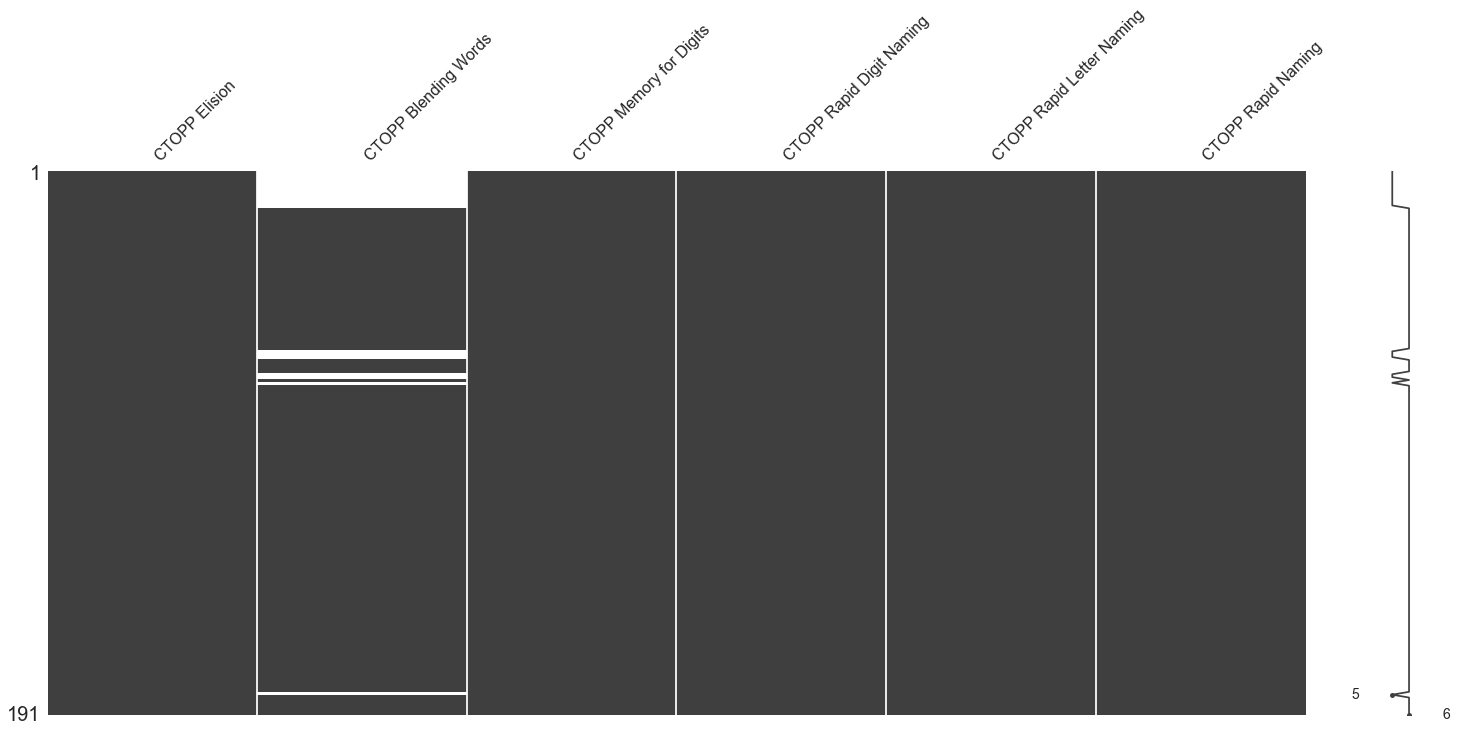

In [3]:
# get a visual on how complete the dataset is
nlit.dataset.Dataset.visualize_missingness(ilabs_data, output_directory='output')

From this figure, we can see that there is relative consistency in complete data for our subject group with the exception of the Blending Words measure

In [4]:
# manage missing data values and normalize for PCA fit
ilabs_data = nlit.dataset.impute_missing(ilabs_data)
ilabs_data = nlit.dataset.normalize_data(ilabs_data)

Imputing row 1/191 with 1 missing, elapsed time: 0.012
Imputing row 101/191 with 0 missing, elapsed time: 0.015


Given the existence of missing data, the impute_missing and normalization functions will properly condense the dataset to usable data in the model and normalize the data to provide a statistically sound environment for model analysis

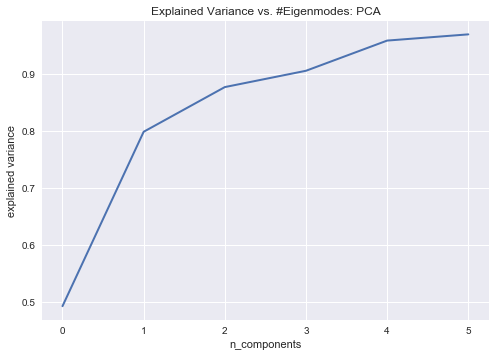

In [5]:
# perform pca fit and plot explained variance as a function of components
pca, pca_data = nlit.reduce.perform_pca(ilabs_data)
nlit.reduce.pca_variance_plot(pca, output_directory='output')
pca_data = nlit.reduce.extract_pca_components(pca_data)

This graph shows that with only 3 components we are able to explain >90% of the variance.  By manipulating the the extract_pca_components function, we could alter the number of components that we use in the model creation.  For now, we will keep them all to achive maximum explanation of variance

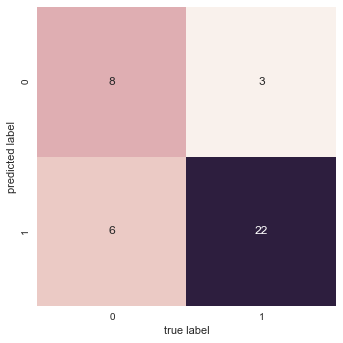

In [6]:
# fit linear model and plot confusion matrix
linear_model = nlit.classify.Classifier(dataset_object = ilabs_data, 
                                        pca_data = pca_data, 
                                        model_type = 'logistic_regression')
linear_model.plot_confusion_matrix(output_directory = 'output')

From this confusion matrix, we can see that the model is very good at predicting the existence of a dyslexia diagnosis (predicted_label = 1) when there is in fact a diagnosis (true label = 1).  However, the model is not good at all at predicting the lack of diagnosis (true = 0) in either scenario (predicted = 0 or 1).  This could indicate that either (A) there are children who are struggling readers who have not been diagnosed or (B) the CTOPP measures used are not predictive enough to model this relationship. 